In [5]:
import snowflake_plot as snp
import ice_funcs as icef
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

params = {
    "xtick.top": True, 
    "ytick.right": True, 
    "xtick.direction": "in", 
    "ytick.direction": "in", 
    "figure.dpi": 400
    }
plt.rcParams.update(params)

sns.set_palette("plasma")

# plate zone (⌐■_■)

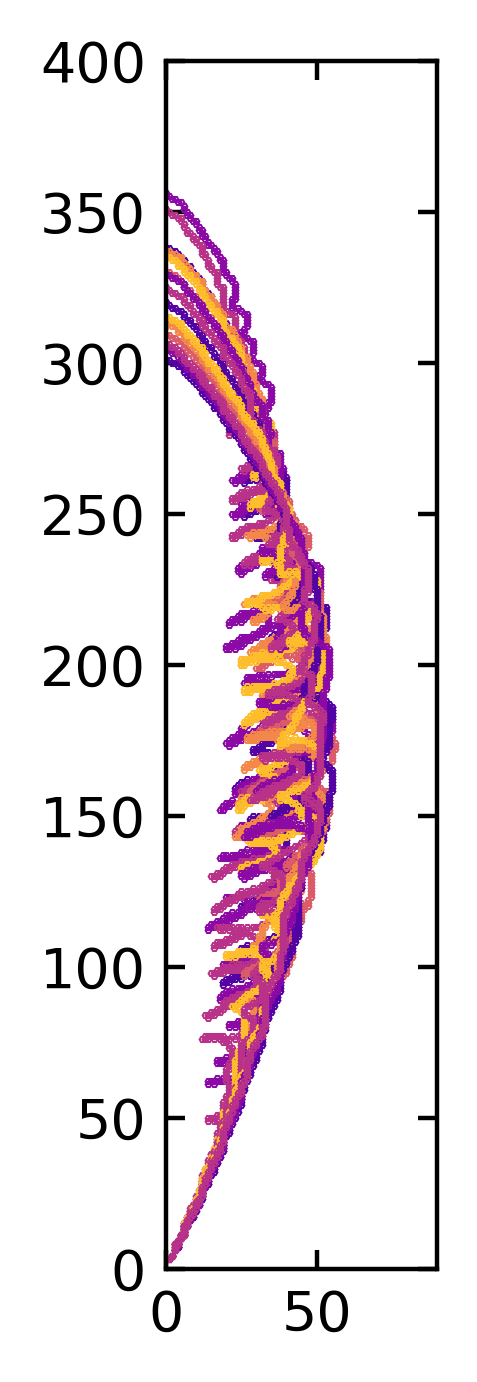

In [6]:
f_name = "exemple_raw_dendrites"
dendrite_specs = pd.read_csv(f"{f_name}/specs.csv")

L = 551 # Length of simulation zone
demi_largeur = 400
demi_largeur_pointe = 90

dendrite_gu = icef.GeneralUtilities(L)

plt.figure()

for i in dendrite_specs["Simulation number"]:

    ice_map = np.genfromtxt(f"{f_name}/{i}", dtype=np.int8).astype("bool") # hacky fix, bite me

    converter = snp.CoordsFromIceMap(L)
    # R = converter.construct_coords_from_ice_map(ice_map) # I just want a slice
    dendrite_boundary_map = dendrite_gu.construct_boundary_map(ice_map)
    _, boundary_cells = dendrite_gu.distinguish_cells(ice_map, dendrite_boundary_map)
    
    R = np.empty_like(boundary_cells)
    for i in range(np.shape(boundary_cells)[0]):
        R[i,:] = converter.coords_from_array_position(boundary_cells[i,0], boundary_cells[i,1])

    plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(0, demi_largeur_pointe)
plt.ylim(0, demi_largeur)
plt.gca().set_aspect(1)

plt.show()

# PLATES (*Zyzz music starts*)

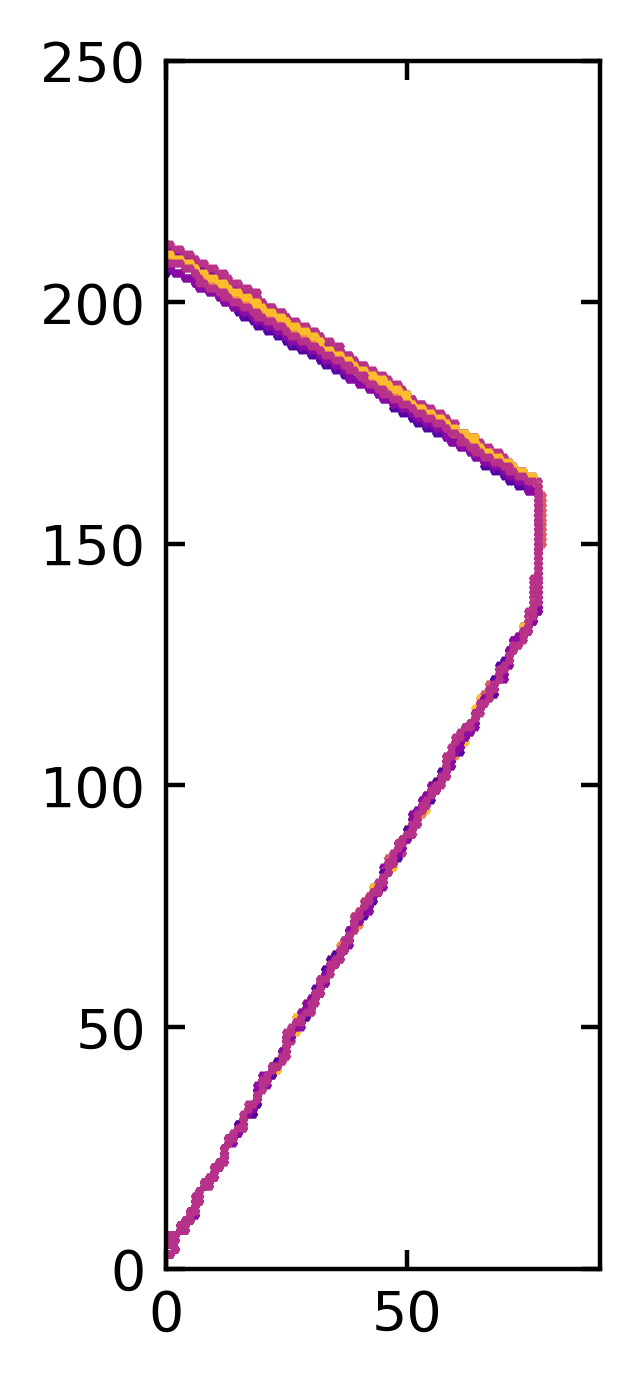

In [7]:
f_name = "exemple_raw_plates"
plate_specs = pd.read_csv(f"{f_name}/specs.csv")

L = 551 # Length of simulation zone
demi_largeur = 250
demi_largeur_pointe = 90

plate_gu = icef.GeneralUtilities(L)

plt.figure()

for i in plate_specs["Simulation number"]:

    ice_map = np.genfromtxt(f"{f_name}/{i}", dtype=np.int8).astype("bool") # hacky fix, bite me

    converter = snp.CoordsFromIceMap(L)
    # R = converter.construct_coords_from_ice_map(ice_map) # I just want a slice
    plate_boundary_map = plate_gu.construct_boundary_map(ice_map)
    _, boundary_cells = plate_gu.distinguish_cells(ice_map, plate_boundary_map)
    
    R = np.empty_like(boundary_cells)
    for i in range(np.shape(boundary_cells)[0]):
        R[i,:] = converter.coords_from_array_position(boundary_cells[i,0], boundary_cells[i,1])

    plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(0, demi_largeur_pointe)
plt.ylim(0, demi_largeur)
plt.gca().set_aspect(1)

plt.show()

# Sweep

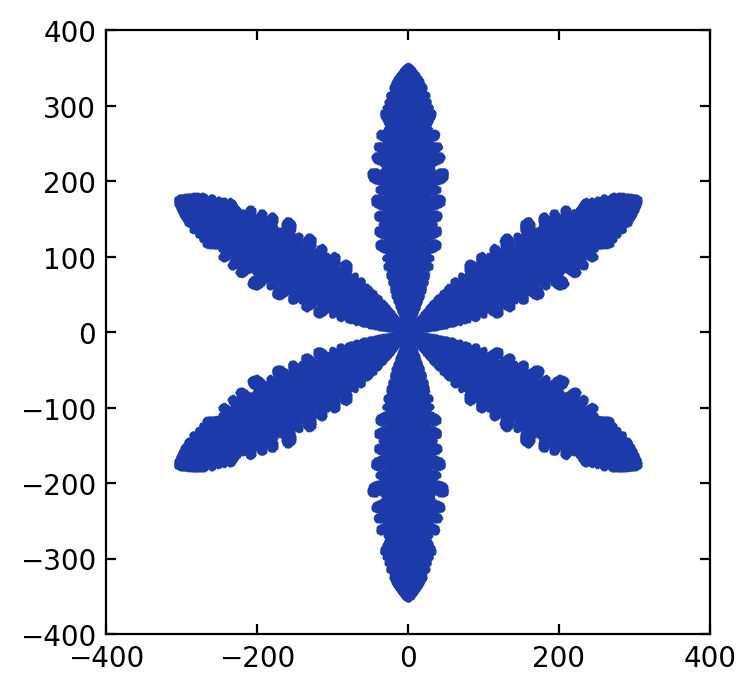

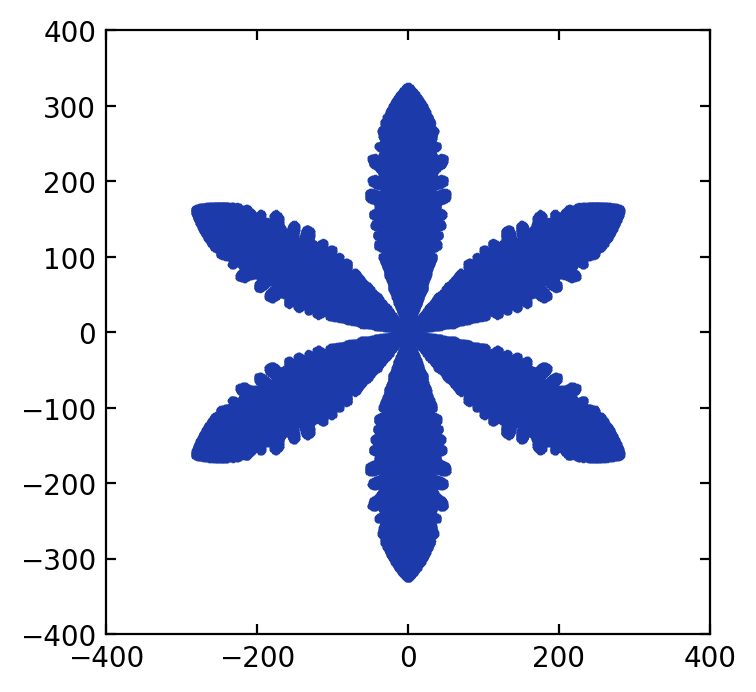

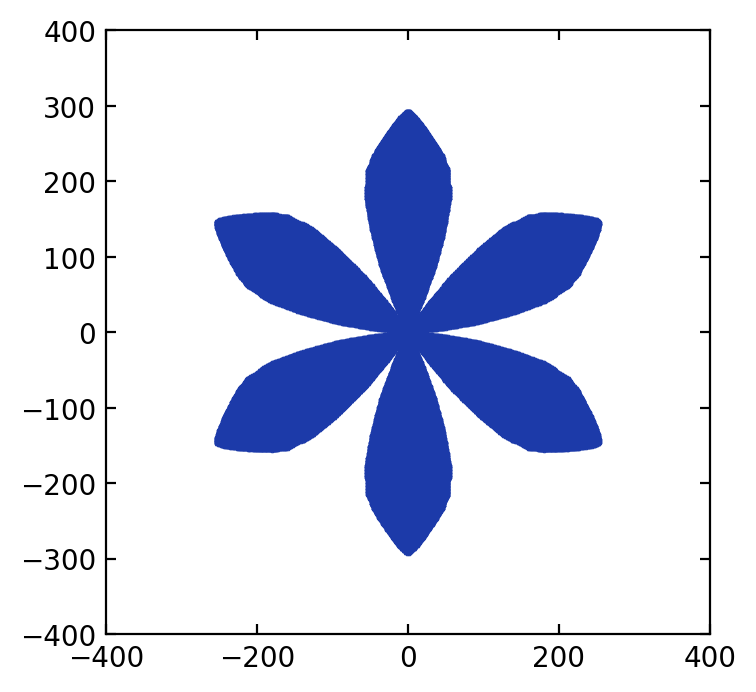

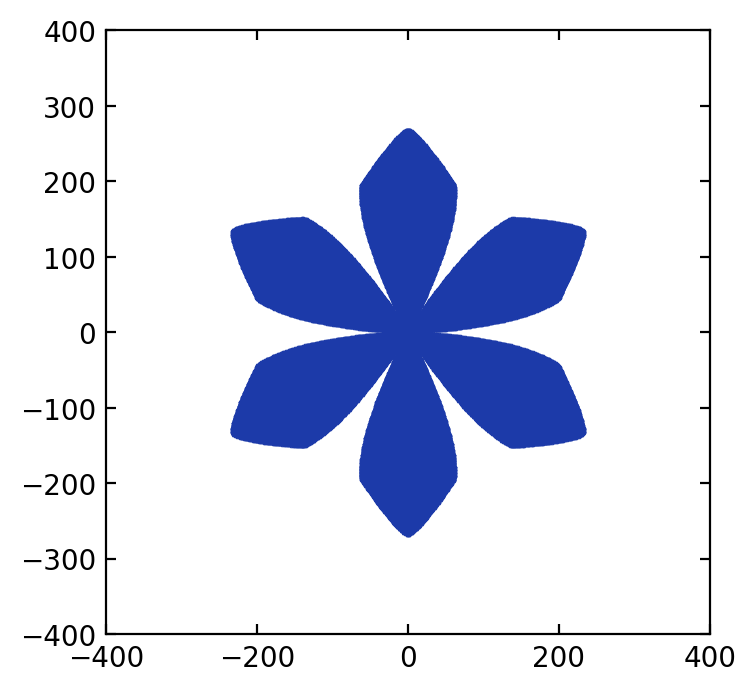

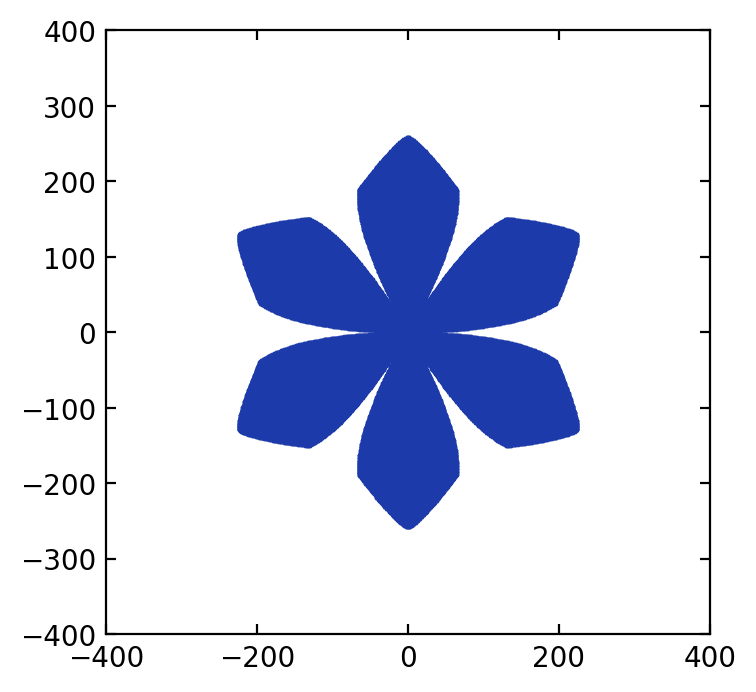

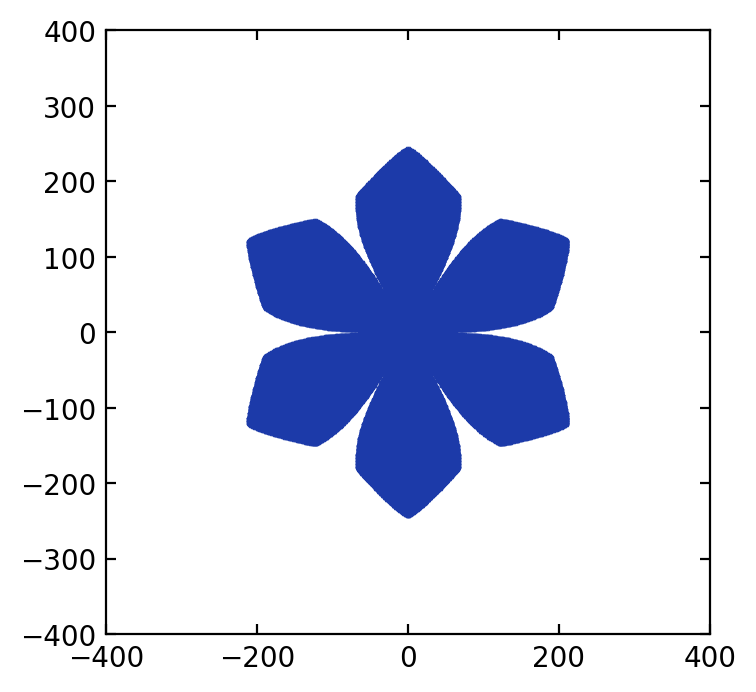

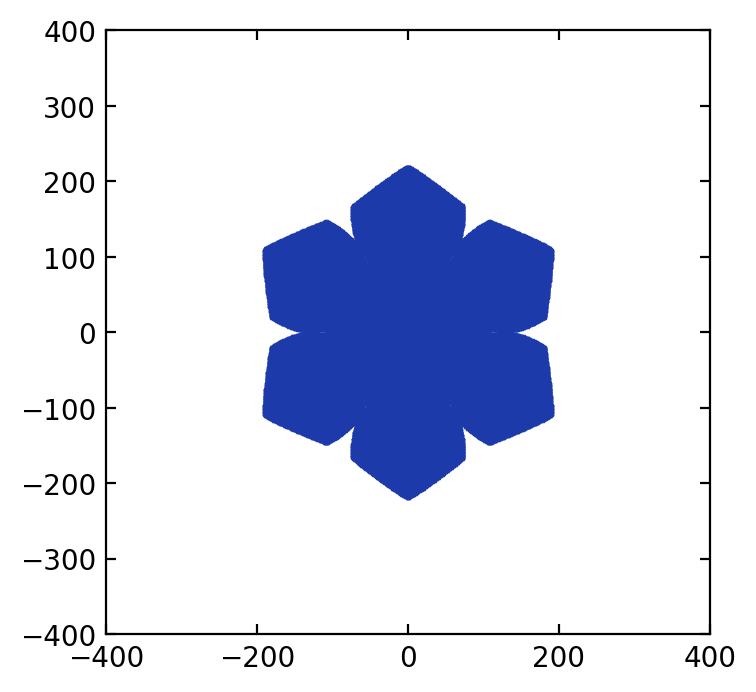

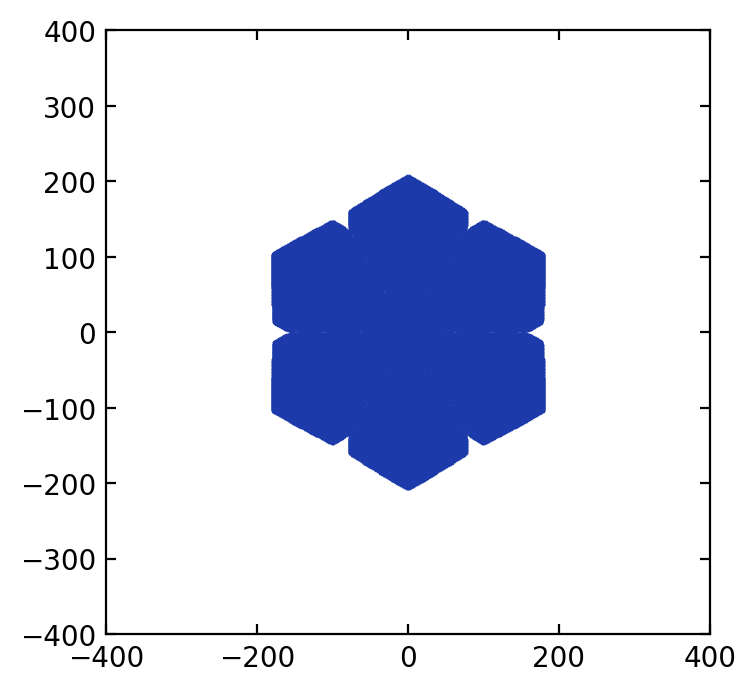

In [8]:
plt.rcParams.update({"figure.dpi" : 200})

f_name = "exemple_raw_sweep"
sweep_specs = pd.read_csv(f"{f_name}/specs.csv")

L = 551 # Length of simulation zone
demi_largeur = 400

for i in sweep_specs["Simulation number"]:

    ice_map = np.genfromtxt(f"{f_name}/{i}", dtype=np.int8).astype("bool") # hacky fix, bite me

    converter = snp.CoordsFromIceMap(L)
    R = converter.convert_ice_map_to_all_coords(ice_map)

    plt.figure()

    plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur, color="#1c3aa9")

    plt.xlim(-demi_largeur, demi_largeur)
    plt.ylim(-demi_largeur, demi_largeur)
    plt.gca().set_aspect(1)

    plt.show()